<a href="https://colab.research.google.com/github/hildj/DS3001_TeamM_Project/blob/main/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/hospital data cleaned.csv')
df.head()

,YEAR,HOSPITAL,Procedure/Condition,Risk Adjuested Mortality Rate,Risk Adjuested Mortality Rate.1,Hospital Ratings
0,2023,Adventist Health and Rideout,AMI,7.0,7.0,As Expected
1,2023,Adventist Health and Rideout,Acute Stroke,5.3,5.3,As Expected
2,2023,Adventist Health and Rideout,Carotid Endarterectomy,3.1,3.1,As Expected
3,2023,Adventist Health and Rideout,GI Hemorrhage,2.2,2.2,As Expected
4,2023,Adventist Health and Rideout,Heart Failure,4.0,4.0,As Expected


In [50]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

df = df.drop('Risk Adjuested Mortality Rate.1', axis = 1)
df = df.drop('YEAR', axis = 1)
df = df.rename(columns={'Risk Adjuested Mortality Rate': 'Risk Adjusted Mortality Rate'})

df.head()

,HOSPITAL,Procedure/Condition,Risk Adjusted Mortality Rate,Hospital Ratings
0,Adventist Health and Rideout,AMI,7.0,As Expected
1,Adventist Health and Rideout,Acute Stroke,5.3,As Expected
2,Adventist Health and Rideout,Carotid Endarterectomy,3.1,As Expected
3,Adventist Health and Rideout,GI Hemorrhage,2.2,As Expected
4,Adventist Health and Rideout,Heart Failure,4.0,As Expected


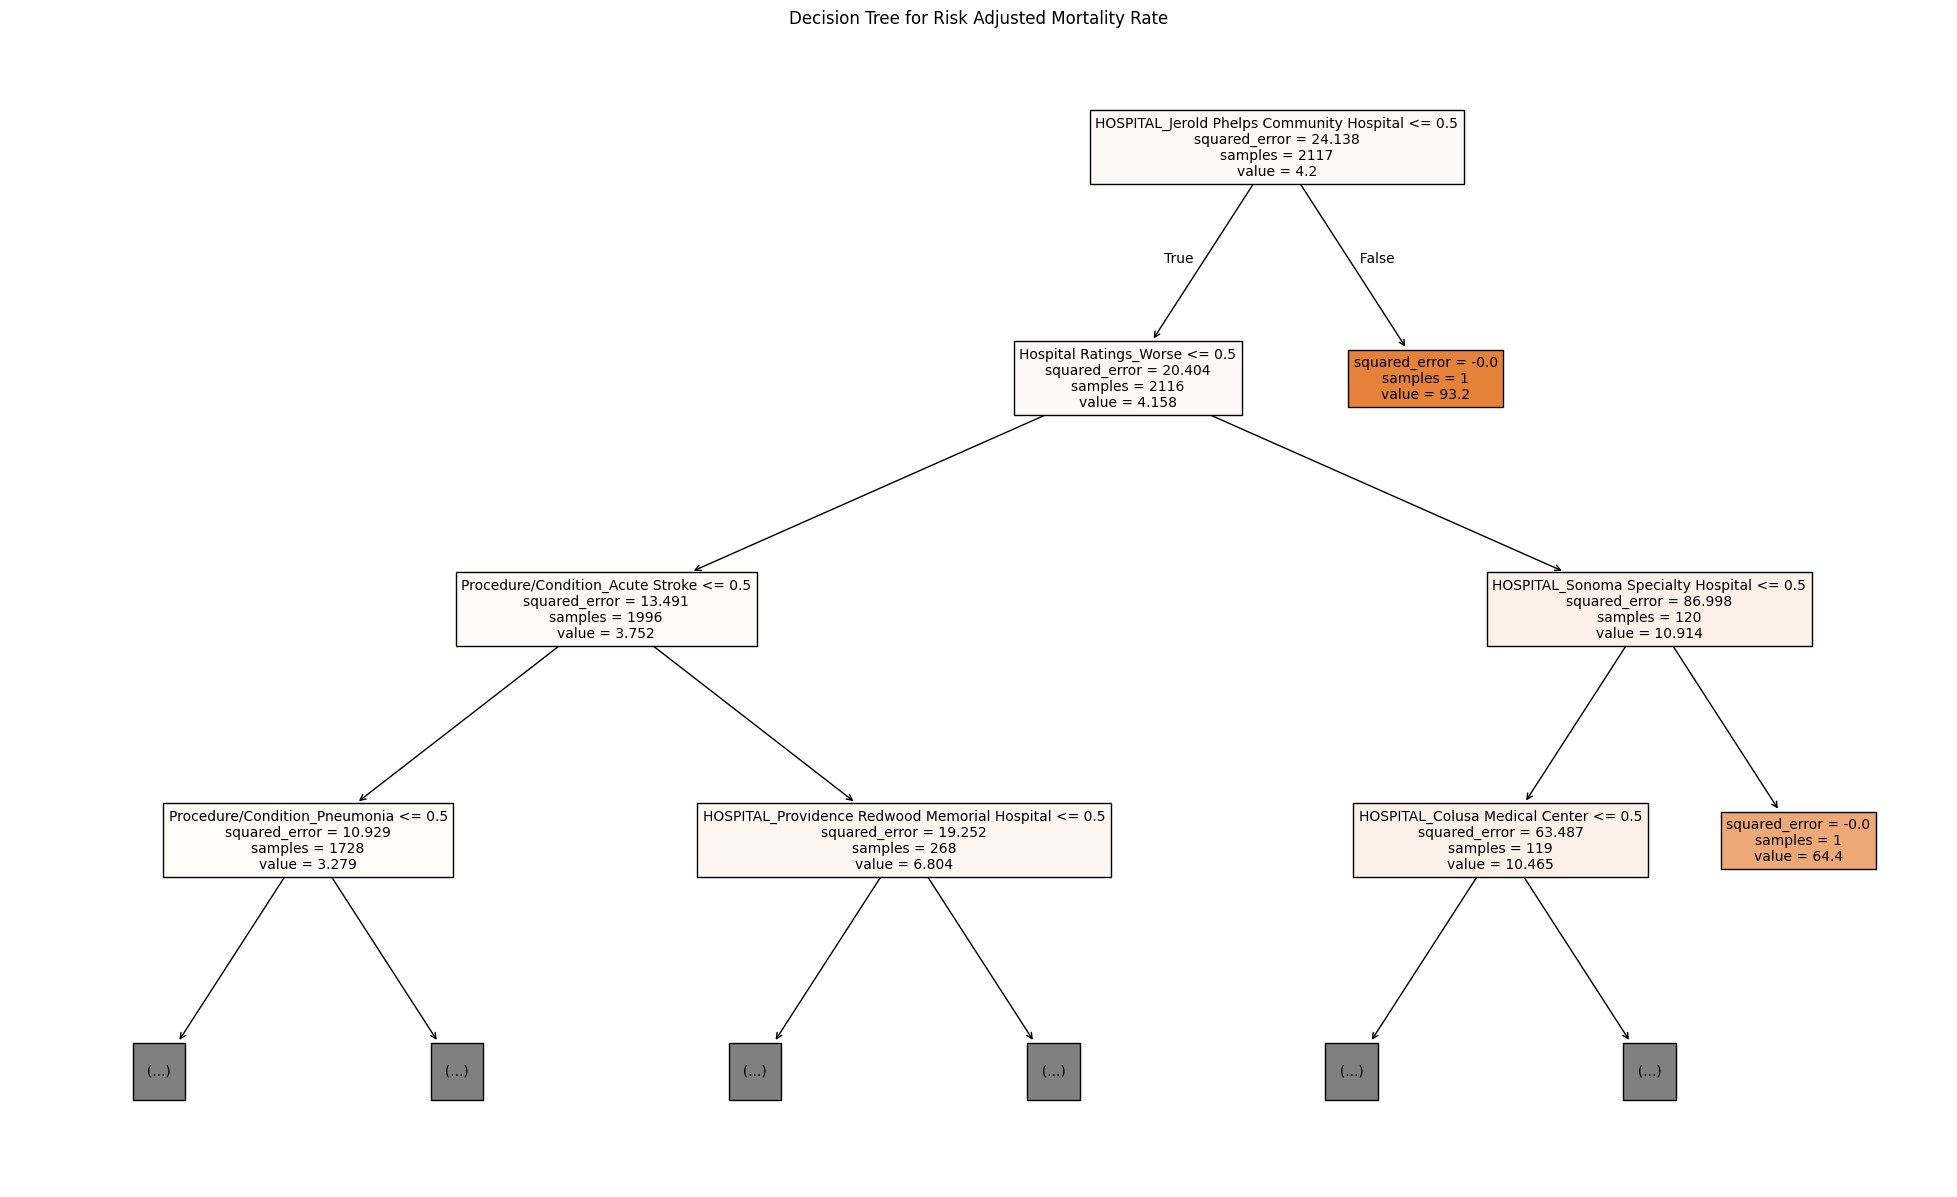

In [64]:
from sklearn.tree import DecisionTreeRegressor # Import the tree regressor

# Process data:
y = df['Risk Adjusted Mortality Rate'] # Target variable is now numerical

# Identify categorical columns for one-hot encoding, including 'Hospital Ratings'
categorical_cols = ['HOSPITAL', 'Procedure/Condition', 'Hospital Ratings']

# Apply one-hot encoding
X_encoded = pd.get_dummies(df[categorical_cols], columns=categorical_cols, drop_first=True)

# Drop original categorical columns and the target variable from X, then concatenate with encoded columns
X = df.drop(['Risk Adjusted Mortality Rate'] + categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Fit decision tree:
cart = DecisionTreeRegressor() # Create a regressor object
cart = cart.fit(X, y) # Fit the regressor

# Visualize results:
plt.figure(figsize=(25,15)) # Increased figure size for better readability
var_names = X.columns.tolist() # Use the column names from the one-hot encoded X
plot_tree(cart,filled=True,feature_names=var_names, max_depth=3, fontsize=10) # Limit depth for visualization
plt.title('Decision Tree for Risk Adjusted Mortality Rate')
plt.show()

In [62]:
## Make Predictions on the Test Set:
y_hat = cart.predict(X)

## Confusion Matrix:
tab = pd.crosstab(y,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y,y_hat)

Accuracy:  0.213982050070855 



col_0,0.0,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,...,27.6,29.3,31.6,32.3,37.3,43.6,53.4,55.6,64.4,93.2
Risk Adjusted Mortality Rate,,,,,,,,,,,,,,,,,,,,,
0.0,451,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.5,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.6,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
55.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
